Use Random Forest Algorithm and find if the personal loan is approved or not

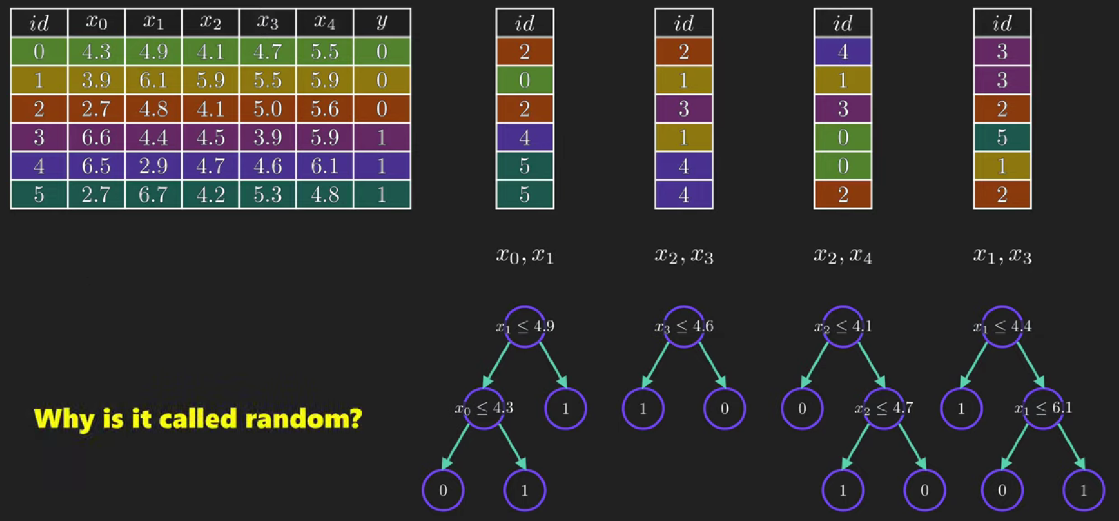

Description of the variables

1. ID: Customer ID

2. Age: Customer’s age

3. Experience: years of experience

4. Income: Annual income of the customer

5. ZIP Code: Home Address ZIP code.

6. Family: the Family size of the customer
7. CCAvg: Avg. spending on credit cards per month

8. Education: Education Level. 1: Advanced/Professional, 2: Graduate, 3: Undergrad

9. Mortgage: Value of house mortgage if any

9. Personal Loan: If this customer accept the personal loan offered in the last campaign?

10. Securities Account: Does the customer have securities account with the bank?

11. CD Account: Does the customer have a CD account with the bank?

12. Online: Do customers use internet banking facilities?

13. Credit card: Does the customer use a credit card issued by UniversalBank?

Import the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score

Get the train/test data

In [ ]:
train_data = data = pd.read_csv('/content/drive/MyDrive/kaggle/bank_loan_train.csv')
X_train = train_data.drop("Personal.Loan", axis=1)
y_train = train_data["Personal.Loan"]

In [ ]:
train_data = data = pd.read_csv('/content/drive/MyDrive/kaggle/bank_loan_test.csv')
X_test = train_data.drop("Personal.Loan", axis=1)
y_test = train_data["Personal.Loan"]

Analyse the dataset

In [ ]:
train_data.head()

,Unnamed: 0,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,4000,4001,62,37,93,93003,3,3.0,3,0,1,0,1,1,1
1,4001,4002,61,35,81,94709,4,1.9,2,0,0,0,0,0,0
2,4002,4003,59,34,60,94015,2,2.8,1,0,0,0,0,1,0
3,4003,4004,47,21,39,92612,3,0.6,2,0,0,0,0,1,1
4,4004,4005,65,39,22,92507,3,0.7,2,0,0,0,0,0,0


In [ ]:
train_data.shape

(1000, 15)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1000 non-null   int64  
 1   ID                  1000 non-null   int64  
 2   Age                 1000 non-null   int64  
 3   Experience          1000 non-null   int64  
 4   Income              1000 non-null   int64  
 5   ZIP.Code            1000 non-null   int64  
 6   Family              1000 non-null   int64  
 7   CCAvg               1000 non-null   float64
 8   Education           1000 non-null   int64  
 9   Mortgage            1000 non-null   int64  
 10  Personal.Loan       1000 non-null   int64  
 11  Securities.Account  1000 non-null   int64  
 12  CD.Account          1000 non-null   int64  
 13  Online              1000 non-null   int64  
 14  CreditCard          1000 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 117.3 KB


In [ ]:
train_data.isnull().sum()

Unnamed: 0            0
ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
train_data.describe()

,Unnamed: 0,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4499.500000,4500.500000,45.330000,20.127000,72.178000,93162.462000,2.38500,1.890810,1.903000,50.605000,0.08300,0.096000,0.062000,0.604000,0.308000
std,288.819436,288.819436,11.370417,11.408902,45.456447,1789.040737,1.13051,1.646553,0.847531,97.750796,0.27602,0.294739,0.241276,0.489309,0.461898
min,4000.000000,4001.000000,23.000000,-3.000000,8.000000,90005.000000,1.00000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,4249.750000,4250.750000,36.000000,11.000000,39.000000,91768.000000,1.00000,0.700000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,4499.500000,4500.500000,45.000000,20.000000,62.000000,93555.000000,2.00000,1.600000,2.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
75%,4749.250000,4750.250000,55.000000,29.000000,92.000000,94608.000000,3.00000,2.500000,3.000000,88.000000,0.00000,0.000000,0.000000,1.000000,1.000000
max,4999.000000,5000.000000,67.000000,43.000000,218.000000,96094.000000,4.00000,8.800000,3.000000,612.000000,1.00000,1.000000,1.000000,1.000000,1.000000


Explore the Dataset

In [ ]:
eduu = train_data.groupby("Education").Experience.mean().sort_values(ascending=True)
eduu

Education
3    19.746032
1    20.104369
2    20.600733
Name: Experience, dtype: float64

In [ ]:
agee = train_data.groupby('Age')['Experience'].mean().sort_values(ascending=False).reset_index()
agee

,Age,Experience
0,67,42.000000
1,66,41.000000
2,65,39.769231
3,64,39.272727
4,63,38.050000
5,62,37.000000
6,61,35.555556
7,60,34.736842
8,59,34.324324
9,58,32.282051


In [ ]:
train_data.Experience.unique()


array([37, 35, 34, 21, 39, 32,  7, 31, 18, 19,  6, 38, -1, 28,  0, 36, 14,
        5, 25, 15, 27,  1, 20, 24, 11,  9, 30,  3, 23, 17,  2, 26, 29, 33,
        4, 12, 40, 16, 22, 41, -2, 10,  8, 42, 13, -3, 43])

In [ ]:
train_data[train_data["Experience"]<0][["Age","Experience"]]


,Age,Experience
15,25,-1
88,29,-1
116,24,-2
285,23,-3
411,23,-2
481,25,-2
514,24,-3
582,25,-1
957,29,-1


In [ ]:
neg_age_exp = train_data[train_data["Experience"]<0][["Age","Experience"]]
neg_age_exp.Age.unique()

array([25, 29, 24, 23])

In [ ]:
train_data["Experience"] = train_data["Experience"].abs()
train_data[train_data["Experience"]<0][["Age","Experience"]]

,Age,Experience


In [ ]:
summ = train_data.describe()
pd.DataFrame(summ, columns=summ.columns).transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,4499.50000,288.819436,4000.0,4249.75,4499.5,4749.25,4999.0
ID,1000.0,4500.50000,288.819436,4001.0,4250.75,4500.5,4750.25,5000.0
Age,1000.0,45.33000,11.370417,23.0,36.00,45.0,55.00,67.0
Experience,1000.0,20.15900,11.352206,0.0,11.00,20.0,29.00,43.0
Income,1000.0,72.17800,45.456447,8.0,39.00,62.0,92.00,218.0
ZIP.Code,1000.0,93162.46200,1789.040737,90005.0,91768.00,93555.0,94608.00,96094.0
Family,1000.0,2.38500,1.130510,1.0,1.00,2.0,3.00,4.0
CCAvg,1000.0,1.89081,1.646553,0.0,0.70,1.6,2.50,8.8
Education,1000.0,1.90300,0.847531,1.0,1.00,2.0,3.00,3.0
Mortgage,1000.0,50.60500,97.750796,0.0,0.00,0.0,88.00,612.0


Clean the dataset by removing extra(not useful) columns

In [ ]:
train_data.head()

,Unnamed: 0,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,4000,4001,62,37,93,93003,3,3.0,3,0,1,0,1,1,1
1,4001,4002,61,35,81,94709,4,1.9,2,0,0,0,0,0,0
2,4002,4003,59,34,60,94015,2,2.8,1,0,0,0,0,1,0
3,4003,4004,47,21,39,92612,3,0.6,2,0,0,0,0,1,1
4,4004,4005,65,39,22,92507,3,0.7,2,0,0,0,0,0,0


In [ ]:
loan_sel = train_data.drop(['ID', 'Age', 'ZIP.Code'], axis=1)

In [ ]:
loan_sel.head()


,Unnamed: 0,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,4000,37,93,3,3.0,3,0,1,0,1,1,1
1,4001,35,81,4,1.9,2,0,0,0,0,0,0
2,4002,34,60,2,2.8,1,0,0,0,0,1,0
3,4003,21,39,3,0.6,2,0,0,0,0,1,1
4,4004,39,22,3,0.7,2,0,0,0,0,0,0


In [ ]:
columns_to_standardize = [0, 1, 2, 3, 4, 5]
sc = StandardScaler()
X_train.iloc[:, columns_to_standardize] = sc.fit_transform(X_train.iloc[:, columns_to_standardize])
X_test.iloc[:, columns_to_standardize] = sc.transform(X_test.iloc[:, columns_to_standardize])

In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4000 entries, 0 to 3999
Series name: Personal.Loan
Non-Null Count  Dtype
--------------  -----
4000 non-null   int64
dtypes: int64(1)
memory usage: 31.4 KB


In [ ]:
classifier_rf = RandomForestClassifier(random_state=0, n_estimators=100)

classifier_rf.fit(X_train, y_train)
y_pred_rf = classifier_rf.predict(X_test)
print("Accuracy using Random Forest: ", r2_score(y_test, y_pred_rf))

Accuracy using Random Forest:  0.8554742415682359


In [ ]:
y_pred_rf = classifier_rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)


Confusion Matrix:
 [[914   3]
 [  8  75]]


In [ ]:
train_data["Personal.Loan"].value_counts()

Understanding the graphs using Plots

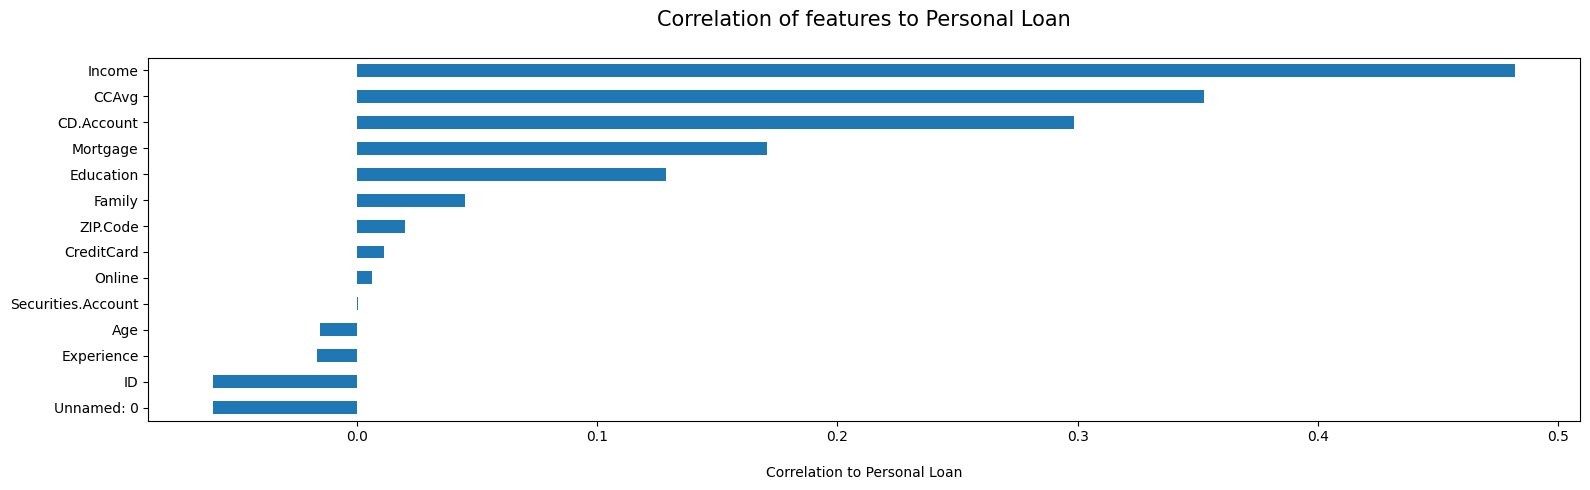

In [ ]:
plt.figure(figsize=(16,5))
corr["Personal.Loan"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of features to Personal Loan\n", fontsize=15)
plt.xlabel("\nCorrelation to Personal Loan")
plt.tight_layout()
plt.show()

<ipython-input-88-b01c7b88bcb7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Experience'])


Text(0.5, 1.0, 'Distribution of Experience')

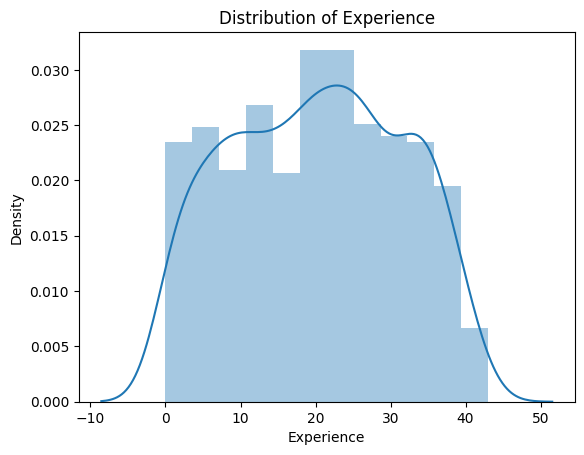

In [ ]:
sns.distplot(train_data['Experience'])
plt.title("Distribution of Experience")

<ipython-input-89-e83e78ba86be>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Education'])


Text(0.5, 1.0, 'Distribution of Education')

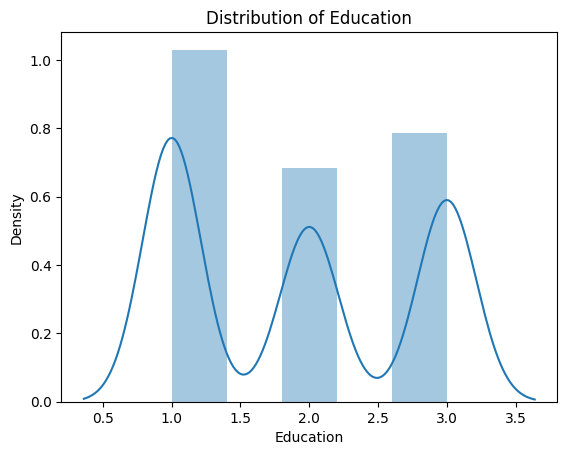

In [ ]:
sns.distplot(train_data['Education'])
plt.title("Distribution of Education")

In [ ]:
train_data["Personal.Loan"].value_counts()

0    917
1     83
Name: Personal.Loan, dtype: int64

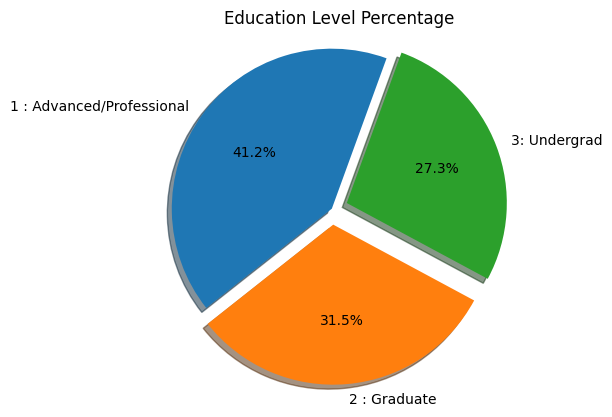

In [ ]:
fig1, ax1 = plt.subplots()
explode = (0, 0.10, 0.10)
ax1.pie(train_data["Education"].value_counts(), explode=explode, labels=["1 : Advanced/Professional", "2 : Graduate", "3: Undergrad"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')
plt.title("Education Level Percentage")
plt.show()

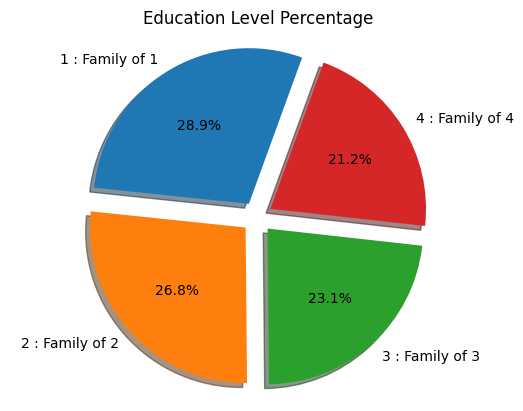

In [ ]:
fig1, ax1 = plt.subplots()
explode = (0.10, 0.10, 0.10, 0.10)
ax1.pie(train_data["Family"].value_counts(), explode=explode, labels=["1 : Family of 1", "2 : Family of 2", "3 : Family of 3", "4 : Family of 4"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')
plt.title("Education Level Percentage")
plt.show()

<ipython-input-93-184253d562dc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data[train_data["Personal.Loan"] == 0]['Income'], color = 'r',label='Personal Loan=0',kde=True)
<ipython-input-93-184253d562dc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data[train_data["Personal.

Text(0.5, 1.0, 'Income Distribution')

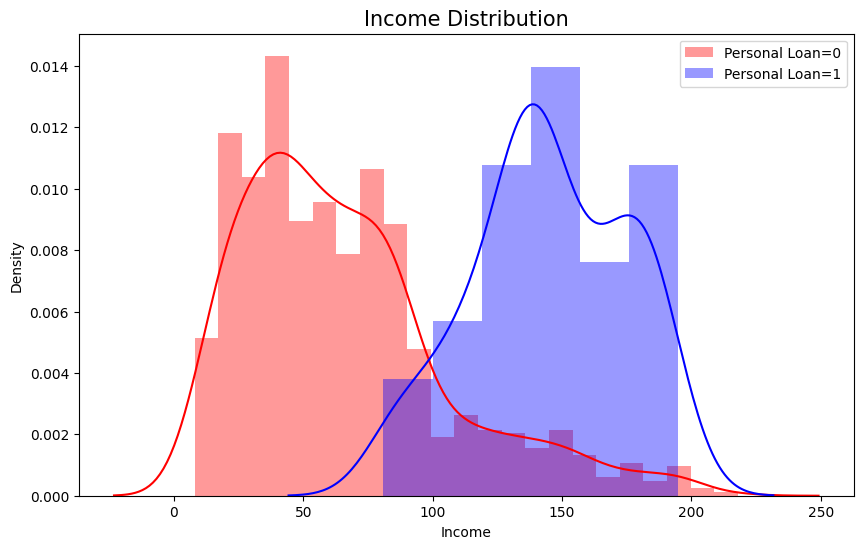

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(train_data[train_data["Personal.Loan"] == 0]['Income'], color = 'r',label='Personal Loan=0',kde=True)
sns.distplot(train_data[train_data["Personal.Loan"] == 1]['Income'], color = 'b',label='Personal Loan=1',kde=True)
plt.legend()
plt.title("Income Distribution", fontsize=15)

<ipython-input-94-9b8f84e03848>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data[train_data["Personal.Loan"] == 0]['Age'], color = 'r',label='Personal Loan=0',kde=True)
<ipython-input-94-9b8f84e03848>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data[train_data["Personal.Loa

Text(0.5, 1.0, 'Age Distribution')

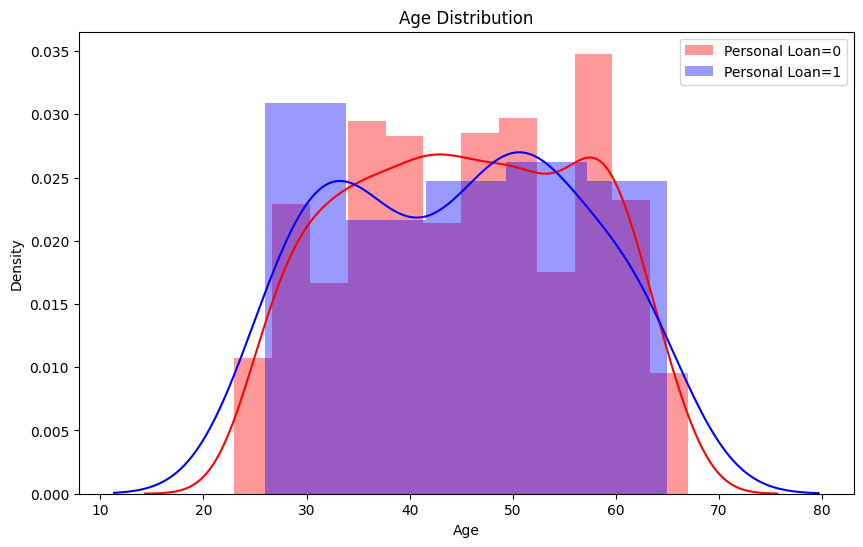

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(train_data[train_data["Personal.Loan"] == 0]['Age'], color = 'r',label='Personal Loan=0',kde=True)
sns.distplot(train_data[train_data["Personal.Loan"] == 1]['Age'], color = 'b',label='Personal Loan=1',kde=True)
plt.legend()
plt.title("Age Distribution")

Text(0.5, 1.0, 'Average of Experience by Age')

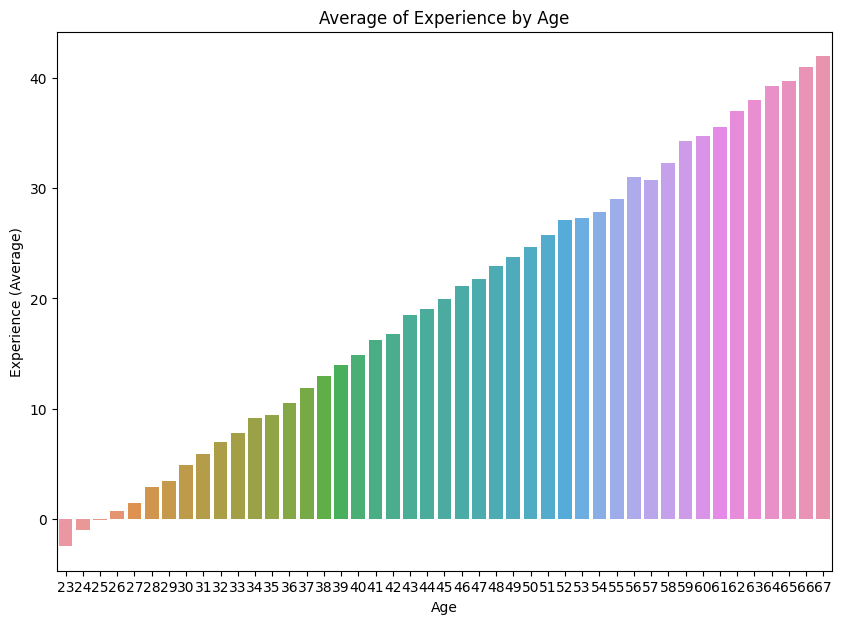

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x="Age", y="Experience", data=agee)
plt.ylabel("Experience (Average)")
plt.title("Average of Experience by Age")

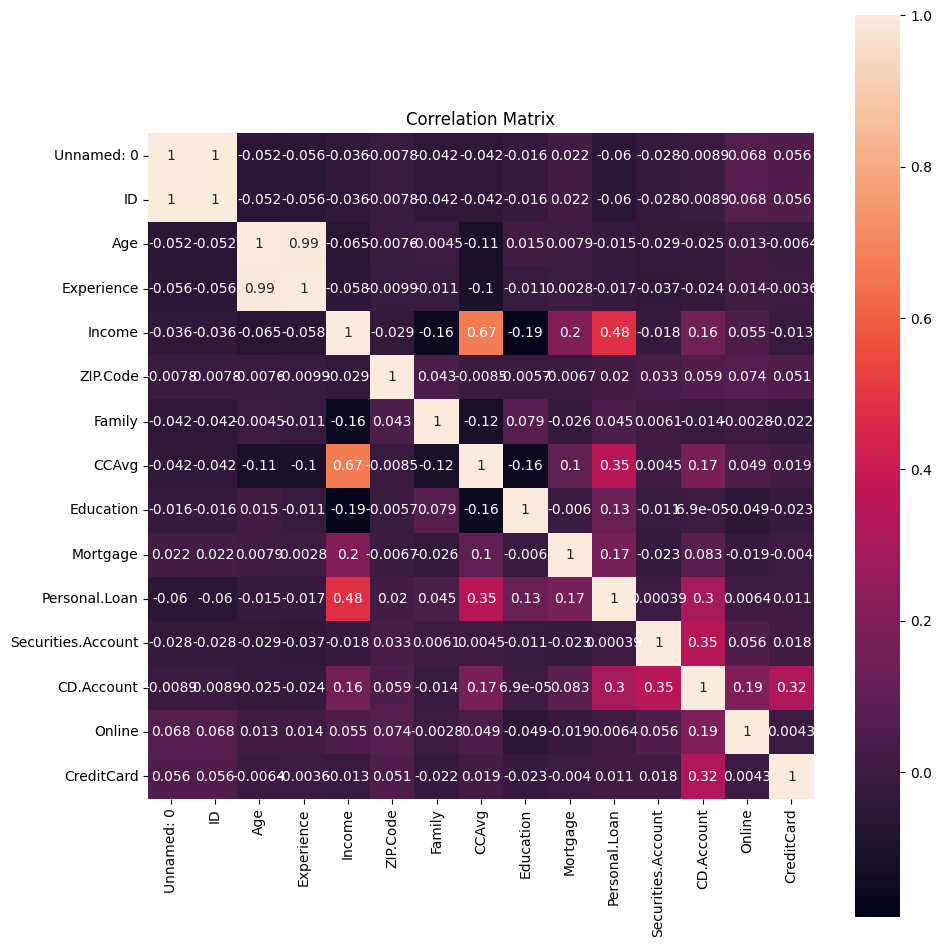

In [ ]:
corr = train_data.corr()
plt.subplots(figsize=(10,10));
sns.heatmap(corr, annot=True, square=True)
plt.title("Correlation Matrix")
plt.tight_layout()